## 50_Startups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [5]:
df.shape

(50, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
# Duplicate Values

df.duplicated().sum()

0

In [9]:
# Correlation using pearson correlation

df.corr()

C:\Users\ppran\AppData\Local\Temp\ipykernel_3840\2925656315.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\ppran\AppData\Local\Temp\ipykernel_3840\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

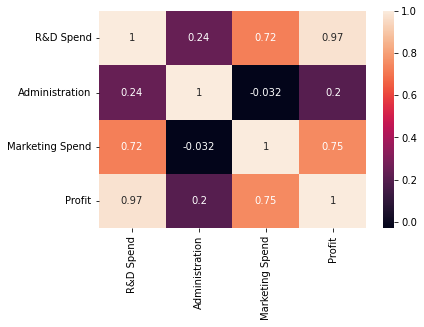

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df[df.corr()>85].sum() # No Highly Correlated features

C:\Users\ppran\AppData\Local\Temp\ipykernel_3840\3584379998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.corr()>85].sum() # No Highly Correlated features


R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State                0
Profit             0.0
dtype: object

In [12]:
# Correlation using Spearman Rank  Correlation

df.corr(method ="spearman")

C:\Users\ppran\AppData\Local\Temp\ipykernel_3840\4070707365.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ="spearman")


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.192226,0.709905,0.989844
Administration,0.192226,1.000000,-0.096096,0.168595
Marketing Spend,0.709905,-0.096096,1.000000,0.721366
Profit,0.989844,0.168595,0.721366,1.000000


C:\Users\ppran\AppData\Local\Temp\ipykernel_3840\212632420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method ="spearman"),annot=True)


<AxesSubplot:>

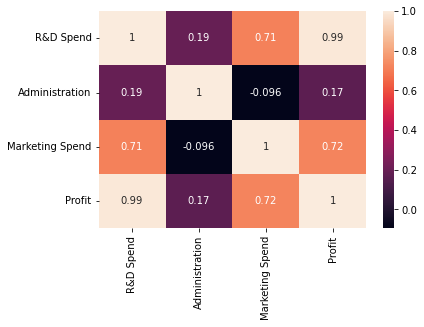

In [13]:
sns.heatmap(df.corr(method ="spearman"),annot=True)

In [14]:
df[df.corr(method ="spearman")>85].sum() # No Highly Correlated features

C:\Users\ppran\AppData\Local\Temp\ipykernel_3840\3669207700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.corr(method ="spearman")>85].sum() # No Highly Correlated features


R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State                0
Profit             0.0
dtype: object

In [15]:
# Checking Null Values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

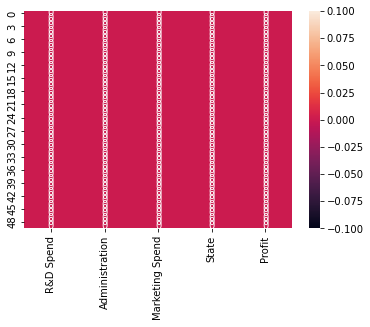

In [16]:
sns.heatmap(df.isnull(),annot=True)

In [17]:
# Converting Categorical data to numerical data
from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()

df["State"]= lbl.fit_transform(df["State"])


In [18]:
df["State"].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [19]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [20]:
#Dividing Data into Features and Target variables


x=df.iloc[:,:-1]
x

y=df.iloc[:,-1]
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [21]:
# Train Test Split

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape


((35, 4), (15, 4), (35,), (15,))

In [22]:
# Scaling the Data and Converting it into Standard Normal distribution

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

xtrain= sc.fit_transform(xtrain)
xtest=sc.transform(xtest)



In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)


In [24]:
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error

r2_score(ytest,ypred)
r2score=r2_score(ytest,ypred)
# Adjusted R2 Score
xtest.shape
1-((1-r2score))* (xtest.shape[0]-1)/ (xtest.shape[0]-1-xtest.shape[1])

print("R2 Score:",r2score)
print("Adj R2 Score:",1-((1-r2score))* (431-1)/ (431-1-8))
print("Mean Squared Error",mean_squared_error(ytest,ypred))
print("Mean Absolute Error",mean_absolute_error(ytest,ypred))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(ytest,ypred)))


R2 Score: 0.9403937677545077
Adj R2 Score: 0.9392637917877684
Mean Squared Error 83866027.64431886
Mean Absolute Error 7371.161531097549
Root Mean Square Error: 9157.839682169528


In [25]:
lr.score(xtrain,ytrain) # Accuracy on Training Data

0.9510015268301873

In [26]:
lr.score(xtest,ytest)  # Accuracy on Test Data

0.9403937677545077

In [27]:
df["State"].dtype

dtype('int32')

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [29]:
df.columns


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [30]:
df2=df.copy()

In [31]:
df2.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [32]:
df2.rename(columns={'R&D Spend':"rnd_Spend","Marketing Spend":"Marketing_Spend"},inplace=True)

In [33]:
df2.columns

Index(['rnd_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [35]:
#Build model using statsmodel

import statsmodels.formula.api as smf 
model = smf.ols('Profit~rnd_Spend+Administration+Marketing_Spend+State',data=df2).fit()

In [36]:
#Coefficients
model.params

Intercept          50142.506443
rnd_Spend              0.805760
Administration        -0.026826
Marketing_Spend        0.027228
State                -22.320577
dtype: float64

In [37]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.368962
rnd_Spend          17.608621
Administration     -0.519906
Marketing_Spend     1.636966
State              -0.013865
dtype: float64 
 Intercept          2.900008e-09
rnd_Spend          8.249206e-22
Administration     6.056771e-01
Marketing_Spend    1.086131e-01
State              9.889988e-01
dtype: float64


In [38]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

In [ ]:
# Q-Q Plot

In [39]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

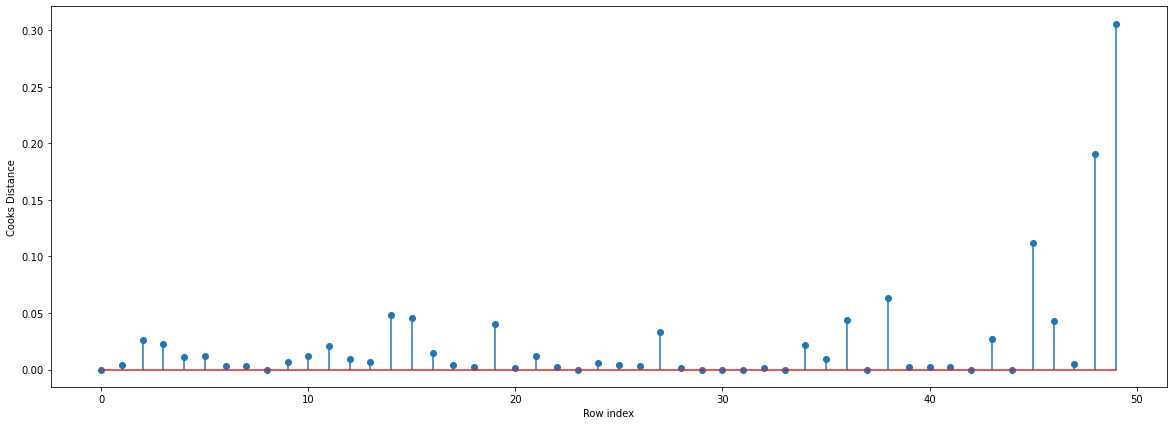

In [43]:

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

### Influence Plot

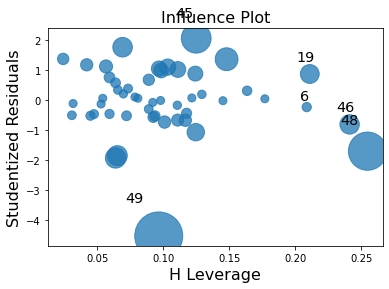

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()